## Contents

01. Consistency checks on ords_prods_all data set
02. Visualizations of ords_prods_all



In [1]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#import data

path = r'/Users/lindazhang/Instacart Basket Analysis'
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 01. Consistency checks on ords_prods_all data set

In [3]:
ords_prods_all.shape

(32433030, 31)

In [4]:
# checking for duplicates..no duplicates

ords_prods_all_dups = ords_prods_all[ords_prods_all.duplicated()]
ords_prods_all_dups

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,First Name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge


In [5]:
ords_prods_all.isnull().sum()

order_id                               0
customer_id                            0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           2077979
product_id                             0
product_name                           0
department_id                          0
prices                                 0
price_range                            0
busiest_day                            0
busiest_days                           0
period_of_day                          0
busiest_periods                        0
max_order                              0
loyalty_flag                           0
mean_spend                             0
spend_flag                             0
median_days_since_prior_order          0
customer_frequency                     0
First Name                             0
last_name                              0
Gender                                 0
STATE           

In [6]:
pd.options.display.max_columns = None
ords_prods_all.head(20)


,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since_prior_order,customer_frequency,First Name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
6,550135,1,7,1,9,20.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


## 02. Visualizations of ords_prods_all

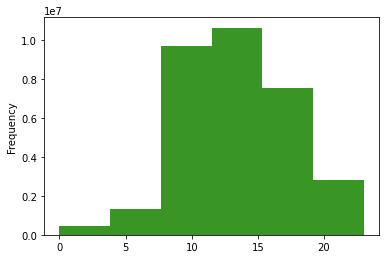

In [7]:
# histogram of order_hour_of_day

hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 6, color = '#399625')

The histogram shows that most Instacart products are purchased during the day between 6am and 6pm. 

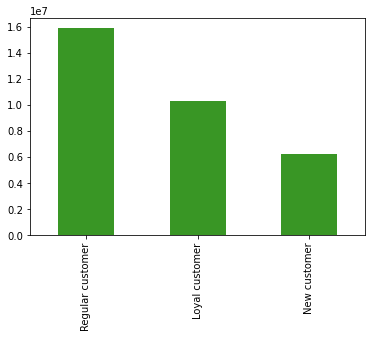

In [8]:
# Bar of count of each customer loyalty type

bar = ords_prods_all ['loyalty_flag'].value_counts().plot.bar(color = '#399625')

Most Instacart customers are regular customers who have made between 10 and 40 orders. New customers that have 10 or less orders make up the smallest percentage of customers. 

In [9]:
# Creating a sample of the ords_prods_all dataset

np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [10]:
# Create a dataframe of the small sample with just the columns order_hour_of_day and prices 

df_2 = small[['order_hour_of_day','prices']]

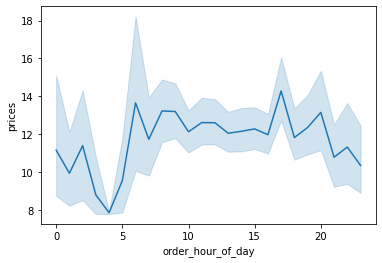

In [11]:
# Create a line chart from df_2 and place hour of the day on the x axis and prices on the y axis 

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The price of products being purchased are higher during the day between 6am and 6pm than they are in the evening and late at night.

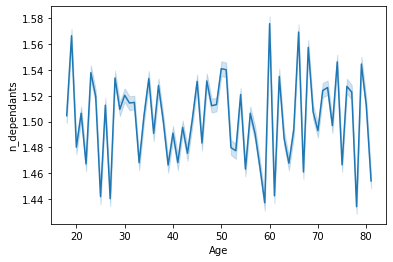

In [12]:
# Create a line chart from df_3 and place age on the x axis and n_dependants on the y axis 

df_3 = small[['Age','n_dependants']]
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

In [13]:
df_3.groupby('Age').agg({'n_dependants': ['mean', 'min', 'max']})

n_dependants        
            mean min max
Age                     
18      1.504542   0   3
19      1.566289   0   3
20      1.480251   0   3
21      1.506469   0   3
22      1.467352   0   3
..           ...  ..  ..
77      1.522755   0   3
78      1.434287   0   3
79      1.544450   0   3
80      1.512939   0   3
81      1.454176   0   3

[64 rows x 3 columns]

There doesn't seem to be a relationship between age and number of dependants. The average number of dependants for Instacart customers across all ages falls within a small range between 1.40 and 1.60. 

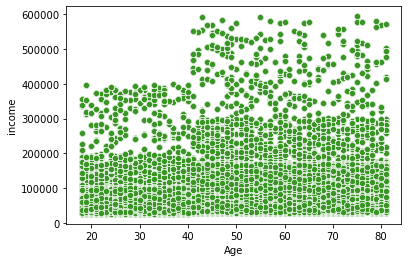

In [14]:
# Create a scatterplot that shows the relationship between age and income.

scatter = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_all, color = '#399625')

Instacart customers 40 years old and over have more spending power. 

The majority of Instacart customers that are 40 years old and over have an annual income of $300,000 or less. There are higher income families that have annual incomes up to $600,000. 

The majority of Instacart customers that are 40 years old and under have an annual income of $200,000 or less. There are higher income families that have annual incomes up to $400,000. 




In [15]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_by_hour.png'))

In [16]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_count_loyalty_flag.png'))

In [17]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_and_prices.png'))

In [18]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_and_dependants.png'))

In [19]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_and_income.png'))